In [51]:
import numpy as np
import matplotlib.pylab as plt

# Number of samples
m = 10
# Create samples of house size in 100 ft^2
min_x = 4
max_x = 30
x = np.random.uniform(min_x, max_x, m)
# Create house prices ($) in 1000's, by assuming the
# relationship y = theta0 + theta1 * x + theta2 * x^3 + eps,
# where eps is noise.
theta0 = 300
theta1 = -2
theta2 = 0.05
ymean = theta0 + theta1 * x + theta2 * x**3
yerr = np.random.uniform(0, 300, m)
y = np.random.standard_normal(size=m) * yerr + ymean

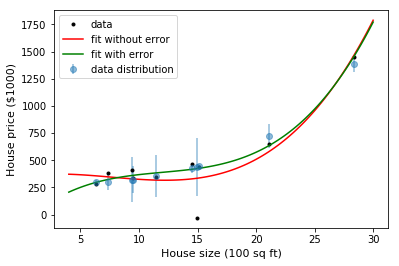

In [58]:
def design_mat(x):
    return np.column_stack((np.repeat(1, len(x)), x, x**2, x**3))

# Solve for theta using normal equation without errors
X = design_mat(x)
thetas_noerr = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

# Solve for theta using normal equation with errors
sigma_inv = np.linalg.inv(np.diag(yerr))
thetas_err = np.linalg.inv(np.transpose(X).dot(sigma_inv).dot(X)).dot(np.transpose(X)).dot(sigma_inv).dot(y)

# Predit house prices
sizes = np.linspace(min_x, max_x, 100)
prices_noerr = design_mat(sizes).dot(thetas_noerr)
prices_err = design_mat(sizes).dot(thetas_err)

# Plot data
plt.errorbar(x, ymean, yerr=yerr, fmt='o', alpha=0.5, label='data distribution')
plt.plot(x, y, 'k.', label='data')
# Plot fits
plt.plot(sizes, prices_noerr, 'r-', label='fit without error')
plt.plot(sizes, prices_err, 'g-', label='fit with error')
plt.xlabel("House size (100 sq ft)", fontsize=11)
plt.ylabel("House price ($1000)", fontsize=11)
plt.legend()
plt.savefig('yerror.pdf')